# Feed-forward nets for image classification

## 1. The MNIST dataset

In [1]:
#!pip install mnist

import mnist
train_imgs = mnist.train_images()
train_labels = mnist.train_labels()
test_imgs = mnist.test_images()
test_labels  = mnist.test_labels()

### Data standardization

Rescale input values to have zero mean and standard deviation of one.

In [2]:
mean, std  = train_imgs.mean(), train_imgs.std()
train_imgs = (train_imgs - mean) / std
test_imgs = (test_imgs - mean) / std

### See some inputs

In [3]:
from typing import List
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Labels: [5 0 8 9 0 4 7 9 7 0 6 8 6 7 1]


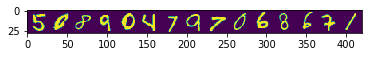

In [4]:
idxs = np.random.randint(0, len(train_imgs), 15)
imgs = np.concatenate(tuple(train_imgs[idx,:,:] for idx in idxs), axis=1)
plt.imshow(imgs)
print("Labels:", train_labels[idxs])

## 2. Building feed forward-networks

### Layers

Each layer will have three methods:
 - `forward` computes and returns ${\bf y}^{(l)} = f_l\left({\bf x}^{(l)}, {\bf w}^{(l)}\right)$
 - `backward` gets $\frac{\partial {\cal L}}{\partial {\bf y}^{(l)}}$, and stores $\frac{\partial {\cal L}}{\partial {\bf w}^{(l)}}$ internally, and returns $\frac{\partial {\cal L}}{\partial {\bf w}^{(l)}}$
 - `update` modifies parameters ${\bf w}^{(l)}$ using stored $\frac{\partial{\cal L}}{\partial{\bf w}}$

In [5]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing

### The feed-forward netowork

In [6]:
class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy:np.ndarray) -> np.ndarray:
        # TODO <0> : Compute the backward phase
        """
        LI YANZHE
        """
        for layer in self.layers[::-1]:
            dy = layer.backward(self._inputs.pop(), dy)
            
        # return dy
        #raise NotImplementedError
        del self._inputs
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

### The linear layer

In [7]:
class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

        
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <1> : compute the output of a linear layer
        """
        LI YANZHE
        """
        out = np.dot(x, self.weight) + self.bias
        # self.a = output
        return out
        raise NotImplementedError
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <2> : compute dweight, dbias and  return dx
        """
        LI YANZHE
        """
        self.dweight = np.dot(np.transpose(x), dy)
        self.dbias = np.sum(dy, axis=0)
        
        dx = np.dot(dy, np.transpose(self.weight))
        return dx
        raise NotImplementedError
    
    def update(self, mode='SGD', lr=0.001, mu=.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        elif mode == 'Nesterov':
            # TODO <9> : compute the nesterov update (for Lab 2)
            raise NotImplementedError
        elif mode == 'Adam':
            # TODO <10> : compute the Adam update  (for Lab 2)
            raise NotImplementedError

### The Rectified Linear Unit
$$y = \max\left(x, 0\right)$$

In [8]:
class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <3> : Compute the output of a rectified linear unit
        """
        LI YANZHE
        """
        x = x * (x > 0)
        return x
        raise NotImplementedError
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <4> : Compute the gradient w.r.t. x
        """
        LI YANZHE
        """
        dx = dy * (x > 0)
        return dx
        raise NotImplementedError

## 3. The loss function

   The negative log likelihood combines a softmax activation, and a cross-entropy cost.

In [9]:
class NegativeLogLikelihood:
    
    def __init__(self):
        pass

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # TODO <5> : Compute the negative log likelihood
        """
        LI YANZHE
        """
        # process t
        m = t.shape[0]
        T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
        t = t.reshape(-1,1)
        T = T == t
        # softmax 
        s = np.exp(y) / np.sum(np.exp(y), axis=1).reshape(-1,1)
        loss = - np.sum(T * np.log(s))/m
        return loss
        raise NotImplementedError
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # TODO <6> : Compute dl/dy
        """
        LI YANZHE
        """
        m = t.shape[0]
        T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
        t = t.reshape(-1,1)
        T = T == t
        # softmax 
        s = np.exp(y) / np.sum(np.exp(y), axis=1).reshape(-1,1)
        dy = s - T
        return dy
        raise NotImplementedError

### Accuracy

In [10]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # TODO <7> : Compute accuracy
    """
    LI YANZHE
    """
    # process t
    m = t.shape[0]
    T = np.repeat(np.arange(10).reshape(1,10), m, axis=0)
    t = t.reshape(-1,1)
    T = T == t
    # compute accuracy
    a = np.sum(y * T) / m
    return a
    raise NotImplementedError

## 4. Training a neural network

In [11]:
BATCH_SIZE = 128
HIDDEN_UNITS = 200
EPOCHS_NO = 20

optimize_args = {'mode': 'SGD', 'lr': .003}

net = FeedForwardNetwork([Linear(784, HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 10)])
nll = NegativeLogLikelihood()

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(train_imgs), BATCH_SIZE)):
        # 1. Prepare next batch
        x = train_imgs[idx:idx + BATCH_SIZE,:,:].reshape(-1, 784)
        t = train_labels[idx:idx + BATCH_SIZE]
        
        # TODO <8> : Compute gradient
        """
        LI YANZHE
        """
        # 2. Compute gradient
        # process forward propagation
        y = net.forward(x)
        loss = nll.forward(y, t)
        # compute dy
        dy = nll.backward(y, t)
        # process backward propagation
        net.backward(dy)
        
        # raise NotImplementedError
        # 3. Update network parameters
        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:3.5f} '
              f'| Train Accuracy: {accuracy(y, t):3.2f} ', end='')

    y = net.forward(test_imgs.reshape(-1, 784), train=False)
    test_nll = nll.forward(y, test_labels)
    print(f' | Test NLL: {test_nll:3.5f} '
          f' | Test Accuracy: {accuracy(y, test_labels):3.2f}')

Epoch 01 | Batch 468 | Train NLL: 0.30067 | Train Accuracy: 10.02  | Test NLL: 0.15565  | Test Accuracy: 11.05
Epoch 02 | Batch 468 | Train NLL: 0.26538 | Train Accuracy: 11.40  | Test NLL: 0.13587  | Test Accuracy: 12.79
Epoch 03 | Batch 468 | Train NLL: 0.21125 | Train Accuracy: 12.30  | Test NLL: 0.10734  | Test Accuracy: 13.84
Epoch 04 | Batch 468 | Train NLL: 0.20060 | Train Accuracy: 13.33  | Test NLL: 0.10005  | Test Accuracy: 15.00
Epoch 05 | Batch 468 | Train NLL: 0.19214 | Train Accuracy: 14.28  | Test NLL: 0.10122  | Test Accuracy: 16.28
Epoch 06 | Batch 468 | Train NLL: 0.18737 | Train Accuracy: 14.96  | Test NLL: 0.09821  | Test Accuracy: 17.25
Epoch 07 | Batch 468 | Train NLL: 0.17800 | Train Accuracy: 15.83  | Test NLL: 0.09683  | Test Accuracy: 18.23
Epoch 08 | Batch 468 | Train NLL: 0.15782 | Train Accuracy: 16.64  | Test NLL: 0.09674  | Test Accuracy: 19.20
Epoch 09 | Batch 468 | Train NLL: 0.14905 | Train Accuracy: 17.33  | Test NLL: 0.09638  | Test Accuracy: 19.98
E